## Winter 2021 Data Science Intern Challenge

<font color='blue'>Name: Thi Dinh</font>

#### Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

b. What metric would you report for this dataset?

c. What is its value?

**My steps will be:**

> Add one more column for unit_price


> Check missing values, outliers

> Calculate average order values (excluding outliers in total_items and unit_price)

> Each store represent for 1 product, products have different price and users would buy more than 1 product as they shop in different stores. I would like to calculate average user spending (excluding outliers in total_items and unit_prices)

> Data visualization for number of items sold in March and number of items sold by shop (excluding outliers in total_items)





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv', parse_dates=['created_at'])
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 04:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11


In [4]:
#add one more column for price of item in each store
df['unit_price'] = df['order_amount']/df['total_items']

In [5]:
#check dataframe info and it also gives information of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
 7   unit_price      5000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 312.6+ KB


**There is no missing values.**

In [6]:
#generate descriptive statistics
df.describe()

,order_id,shop_id,user_id,order_amount,total_items,unit_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


**There are outliers in order_amount, total_items, unit_price. Because order_amount is relevant to total_items and unit_price so I will check total_items and unit_price only.**

In [7]:
selected_columns = ['total_items', 'unit_price']
for col in selected_columns:
  print(df[col].value_counts().sort_index(ascending=False))

2000      17
8          1
6          9
5         77
4        293
3        941
2       1832
1       1830
Name: total_items, dtype: int64
25725.0     46
352.0       51
201.0       53
196.0       61
195.0       54
193.0       44
190.0       35
187.0      105
184.0       49
181.0      112
178.0      109
177.0      148
176.0      152
173.0       99
172.0       35
171.0       48
169.0       54
168.0       39
166.0       43
165.0       58
164.0      161
163.0      122
162.0       48
161.0      101
160.0      206
158.0       94
156.0      197
155.0       42
154.0       54
153.0      256
149.0       52
148.0      101
147.0       53
146.0       89
145.0       92
144.0       39
142.0      197
140.0       55
138.0       59
136.0      105
134.0       86
133.0      151
132.0       46
131.0       97
130.0      150
129.0      142
128.0       93
127.0       52
122.0       50
118.0      118
117.0       77
116.0       58
114.0       59
112.0      124
111.0       40
101.0       42
94.0        55
90.0     

In [8]:
df[df['total_items'] == 2000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,unit_price
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352.0


**There are 17 orders have 2000 items purchased by user_id = 607 at shop_id = 42**

In [9]:
df[df['unit_price'] == 25725]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,unit_price
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 07:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,25725.0
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,25725.0
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 09:27:20,25725.0


Product sold at shop_id = 78 is too expensive at unit price 25,725 compare to other products from other stores which have unit price are in a range from 90 to 352

In [10]:
#Our previous calculation of average order value
aov = df['order_amount'].sum() / len(df)
aov

3145.128

In [11]:
#Exclude orders which has 2000 items and orders have items which has price is 25725
df_new = df[(df['total_items'] != 2000) & (df['unit_price'] != 25725)]
#generate descriptive statistics
df_new.describe()

,order_id,shop_id,user_id,order_amount,total_items,unit_price
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734,151.788536
std,1444.069407,29.061131,86.840313,160.804912,0.982821,29.034215
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000,352.000000


In [12]:
#Calculate new average order value (exclude orders which has 2000 items and orders have items which has price is 25725)
aov_new = df_new['order_amount'].sum() / len(df_new)
aov_new

302.58051448247926

In [13]:
#calculate total spending group by users (exclude orders which has 2000 items and orders have items which have price is 25725)
spending_by_user = df_new.groupby('user_id')['order_amount'].sum()

#Calculate average user spending (exclude orders which has 2000 items and orders have items which have price is 25725)
average_spending = spending_by_user.sum()/len(spending_by_user)
average_spending

4979.466666666666

<ipython-input-14-c899c9ff535e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ex_2000['created_date'] = [x.strftime("%d") for x in df_ex_2000['created_at']]


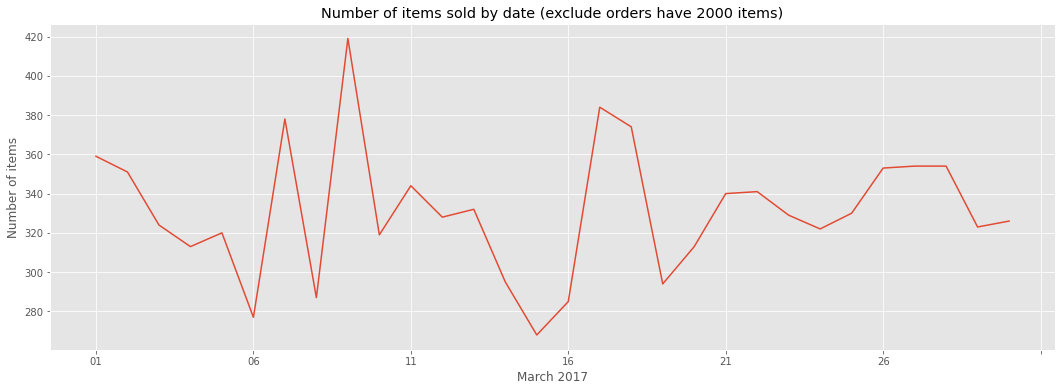

In [14]:
#dataframe exclude orders has 2000 items
df_ex_2000 = df[df['total_items'] != 2000]

#add one more column for date of orders
df_ex_2000['created_date'] = [x.strftime("%d") for x in df_ex_2000['created_at']]

#calculate number of items sold by date (exclude orders has 2000 items)
df_by_date = df_ex_2000.groupby('created_date')['total_items'].sum()
#plot
plt.style.use('ggplot')
plt.figure(figsize=(18,6))
df_by_date.plot()
plt.xlabel('March 2017')
plt.ylabel('Number of items')
plt.title('Number of items sold by date (exclude orders have 2000 items)')
plt.show()

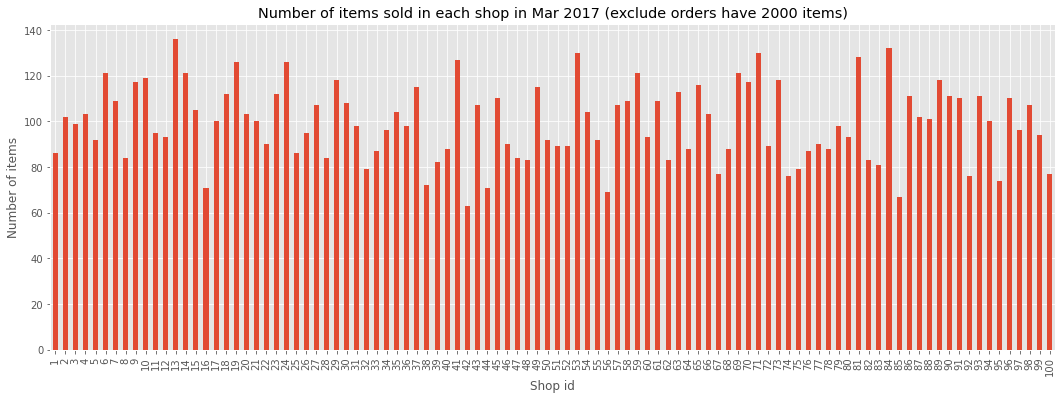

In [15]:
#total of items sold by shop_id (exclude orders has 2000 items)
df_by_shop = df_ex_2000.groupby('shop_id')['total_items'].sum()
#plot
plt.figure(figsize=(18,6))
df_by_shop.plot(kind='bar')
plt.ylabel('Number of items')
plt.xlabel('Shop id')
plt.title('Number of items sold in each shop in Mar 2017 (exclude orders have 2000 items)')
plt.show()